In [4]:
import numpy as np
from nonlinear_model import discrete_nonlinear
from Koopman_numpy import Koopman_numpy
from MPC import *
import time

# Test Koopman operater in numpy

In [5]:
file_name = 'newnew-unmasked-encoder_[3, 32, 64, 8]_decoder_[11, 128, 64, 32, 3]_hyper_[1.0, 3.0, 0.3, 1e-07, 1e-07, 1e-07, 10]_batch_10'
operater = Koopman_numpy(file_name)
x = np.array([.1,.1,0.3])
nonlinear_x = x
u = np.array([0.5,0.3])
lifted_x = operater.encode(x)
for i in range(5):
    next_lifted_x = operater.linear(lifted_x,u)
    nonlinear_x = discrete_nonlinear(nonlinear_x,u,0.1)
next_x = operater.decode(next_lifted_x)
print(next_x,nonlinear_x)
operater.property()

[0.14576261 0.12515234 0.32710256] [[0.33376368 0.18798932 0.45      ]]
The system is controllable.


In [6]:
file_name = 'newnew_unmasked_encoder_[3, 32, 64, 8]_decoder_[11, 128, 64, 32, 3]_hyper_[1.0, 3.0, 0.3, 1e-07, 1e-07, 1e-07, 10]_batch_10'
operater = Koopman_numpy(file_name)
A,B = operater.linear_matrix()
print(A)

[[ 1.00493824e+00 -1.06460983e-02 -8.63089153e-05  4.19450030e-02
  -5.19815460e-03 -4.90116095e-03  9.68542136e-03 -1.52511492e-01
   3.03379819e-02  6.88124746e-02  6.24686368e-02]
 [-1.43866660e-03  1.01267827e+00  8.27280711e-03  1.93732947e-01
  -1.63389757e-01  8.23331624e-02  6.42161593e-02  1.05091192e-01
   2.88880229e-01 -5.97685799e-02 -1.84435487e-01]
 [-8.71501025e-03  1.09735755e-02  9.94444072e-01 -2.50838369e-01
   1.29439890e-01  3.97230573e-02 -1.55725971e-01  2.11073294e-01
  -2.68983245e-01 -1.04371555e-01  1.33916587e-01]
 [ 3.76493181e-03  1.15479939e-02 -1.44164255e-02  3.14485580e-01
   3.70251715e-01  4.12123837e-02 -4.37958129e-02  1.01388693e-01
   1.99879892e-02  1.00508727e-01 -6.51753088e-03]
 [ 1.09393392e-02  9.10447445e-03  1.29327951e-02  4.42575067e-01
   6.48735106e-01  4.19968553e-02  1.50915161e-02  1.44489616e-01
   4.83238474e-02  1.22478366e-01 -1.76421460e-02]
 [ 4.93674364e-04 -2.29091756e-03 -2.56545469e-02  1.52178556e-01
   1.11941978e-01 -

In [7]:
Ae = np.linalg.eigvals(A)
print(Ae)

[-0.4385396 +0.j         -0.57685316+0.j         -0.5366118 +0.j
 -0.01473735+0.j         -0.12707312+0.1079601j  -0.12707312-0.1079601j
 -0.21182403+0.j          0.9994533 +0.00037098j  0.9994533 -0.00037098j
  1.0003072 +0.j          0.99990046+0.j        ]


# Test MPC function

In [8]:
# get augmented matrices
A,B = operater.linear_matrix()
Q = np.diag(np.array([1.,2.,3.,4.,5.,6.,7.,8.,9.,10.,11.]))
R = np.diag(np.array([1.,2.]))
rho = 1.
Gamma,Theta,Qbig,H = get_Augmented_Matrix(A,B,Q,R,rho,3,2)
print(Gamma.shape)
print(Theta.shape)
print(Qbig.shape)
print(H.shape)

TypeError: get_Augmented_Matrix() takes 6 positional arguments but 7 were given

In [1]:
import matplotlib.pyplot as plt
%matplotlib notebook
import numpy as np
from nonlinear_model import discrete_nonlinear
from Koopman_numpy import Koopman_numpy
from MPC import *
import time

In [2]:
SimLength = 30
init_x = np.array([0.,0.,0.])
path=simulate_path(init_x,SimLength)

./dataset/MPC/SimLenth_30_Ts_0.1


[ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.03        0.06        0.09
  0.12        0.15        0.18        0.21        0.24        0.27
  0.3         0.33        0.36        0.39        0.42        0.45
  0.48        0.51        0.54        0.57        0.6         0.63
  0.66        0.69        0.72        0.75        0.78        0.78539816
  0.78539816  0.78539816  0.78539816  0.78539816  0.78539816  0.78539816
  0.78539816  0.78539816  0.78539816  0.78539816  0.78539816  0.78539816
  0.78539816  0.78539816  0.78539816  0.78539816  0.78539816  0.78539816
  0.78539816  0.78539816  0.78539816  0.78539816  0.78539816  0.78539816
  0.78539816  0.78539816  0.78539816  0.78539816  0.78539816  0.78539816
  0.78539816  0.78539816  0.785398

[0.5  0.   0.09]
0.02914961786811487 [0.5  0.   0.09] [0.49567092 0.00181763 0.118769  ] [0.0744577  0.29606575]
Point 30 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[0.5  0.   0.12]
0.02856538730266517 [0.5  0.   0.12] [0.50067259 0.00241448 0.14845521] [0.05037152 0.29686212]
Point 31 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[0.5  0.   0.15]
0.028551012547359277 [0.5  0.   0.15] [0.50386366 0.00289172 0.17814019] [0.03226568 0.29684976]
Point 32 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[0.5  0.   0.18]
0.0286384380663461 [0.5  0.   0.18] [0.50577179 0.00323528 0.20786359] [0.01938808 0.29723397]
Point 33 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[0.5  0.   0.21]
0.028728709000256532 [0.5  0.   0.21] [0.50693077 0.00347972 0.23766215] [0.0118448  0.29798564]
Point 34 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[0.5  0.   0.24]
0.028596391176104446 [0.5  0.   0.24] [0.50764489 0.00365271 0.2673124 ]

[0.76       0.26       0.78539816]
0.05054045034298996 [0.76       0.26       0.78539816] [0.72511308 0.22353212 0.78810627] [0.13370106 0.00113016]
Point 81 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[0.77       0.27       0.78539816]
0.05120113901758025 [0.77       0.27       0.78539816] [0.73462277 0.23309345 0.78821143] [0.13485292 0.00105163]
Point 82 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[0.78       0.28       0.78539816]
0.051935294423684435 [0.78       0.28       0.78539816] [0.74407797 0.242602   0.78827424] [0.13409449 0.00062815]
Point 83 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[0.79       0.29       0.78539816]
0.05305884431342744 [0.79       0.29       0.78539816] [0.75325589 0.25183287 0.78829317] [0.13017033 0.00018929]
Point 84 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[0.8        0.3        0.78539816]
0.054932010826001076 [0.8        0.3        0.78539816] [0.76189962 0.26052679 0.78818261] [

[1.         0.5        0.27539816]
0.02891625290587479 [1.         0.5        0.27539816] [0.986474   0.48068476 0.25866142] [ 0.0010007  -0.28516415]
Point 123 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[1.         0.5        0.24539816]
0.027983601467296643 [1.         0.5        0.24539816] [0.98650311 0.48069247 0.23029402] [ 0.00030115 -0.28367399]
Point 124 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[1.         0.5        0.21539816]
0.027126675577272354 [1.         0.5        0.21539816] [0.98649538 0.48069065 0.20195827] [-7.94490997e-05 -2.83357537e-01]
Point 125 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[1.         0.5        0.18539816]
0.02638164876252829 [1.         0.5        0.18539816] [0.98643865 0.48067904 0.1736176 ] [-0.00057906 -0.28340661]
Point 126 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[1.         0.5        0.15539816]
0.02578294156181485 [1.         0.5        0.15539816] [0.98628679 0.48

[ 1.5   0.5  -0.21]
0.03661938131033603 [ 1.5   0.5  -0.21] [ 1.48642262  0.47884191 -0.23662648] [ 0.00554363 -0.29772774]
Point 165 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 1.5   0.5  -0.24]
0.036274026583512586 [ 1.5   0.5  -0.24] [ 1.48677533  0.47875686 -0.26626103] [ 0.00362814 -0.2963456 ]
Point 166 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 1.5   0.5  -0.27]
0.03513158471701494 [ 1.5   0.5  -0.27] [ 1.48709033  0.47867094 -0.29475157] [ 0.00326511 -0.28490533]
Point 167 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 1.5  0.5 -0.3]
0.034049136471479245 [ 1.5  0.5 -0.3] [ 1.48739851  0.47857738 -0.32327268] [ 0.00322063 -0.28521111]
Point 168 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 1.5   0.5  -0.33]
0.033026028294017844 [ 1.5   0.5  -0.33] [ 1.48767639  0.47848429 -0.35181562] [ 0.00293059 -0.28542939]
Point 169 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 1.5   0.5  -0.36]
0.03206087181

[ 1.7         0.3        -0.78539816]
0.028066656677557533 [ 1.7         0.3        -0.78539816] [ 1.67248408  0.29495369 -0.7831297 ] [0.12459626 0.00070689]
Point 205 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 1.7         0.3        -0.78539816]
0.023560740386323532 [ 1.7         0.3        -0.78539816] [ 1.68059303  0.28688145 -0.78287199] [0.11441864 0.00257704]
Point 206 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 1.71        0.29       -0.78539816]
0.024130960544743566 [ 1.71        0.29       -0.78539816] [ 1.68885312  0.27866298 -0.78283206] [0.11652143 0.00039935]
Point 207 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 1.72        0.28       -0.78539816]
0.024736140923302712 [ 1.72        0.28       -0.78539816] [ 1.69748822  0.27007209 -0.78284219] [ 1.21806538e-01 -1.01262137e-04]
Point 208 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 1.73        0.27       -0.78539816]
0.02526193774818154 [ 1.73        0.

0.022179491444353792 [ 2.01       -0.01       -0.78539816] [ 1.99315461 -0.02379845 -0.78118324] [0.11568214 0.00142532]
Point 240 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 2.02       -0.02       -0.78539816]
0.022419976050933196 [ 2.02       -0.02       -0.78539816] [ 2.00183746 -0.0324084  -0.78106124] [0.12227968 0.00121996]
Point 241 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 2.03       -0.03       -0.78539816]
0.02266288528670682 [ 2.03       -0.03       -0.78539816] [ 2.01097125 -0.04146332 -0.78091424] [0.1286148 0.00147  ]
Point 242 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 2.04       -0.04       -0.78539816]
0.02284413087352325 [ 2.04       -0.04       -0.78539816] [ 2.02043729 -0.05084484 -0.7807566 ] [0.13327373 0.00157642]
Point 243 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 2.05       -0.05       -0.78539816]
0.022959669706225348 [ 2.05       -0.05       -0.78539816] [ 2.03012193 -0.06043999 -0.7

[ 2.35       -0.35       -0.78539816]
0.02983289040543395 [ 2.35       -0.35       -0.78539816] [ 2.32223087 -0.34816452 -0.7746507 ] [0.133184   0.00195753]
Point 278 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 2.36       -0.36       -0.78539816]
0.030175630293746196 [ 2.36       -0.36       -0.78539816] [ 2.33198068 -0.35770697 -0.7744333 ] [0.13642477 0.00217406]
Point 279 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 2.37       -0.37       -0.78539816]
0.03047394379285282 [ 2.37       -0.37       -0.78539816] [ 2.34178443 -0.36729805 -0.774207  ] [0.13715039 0.00226299]
Point 280 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 2.38       -0.38       -0.78539816]
0.031025876410004108 [ 2.38       -0.38       -0.78539816] [ 2.35134456 -0.37664657 -0.77398653] [0.13371274 0.00220471]
Point 281 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 2.39       -0.39       -0.78539816]
0.03236674702770746 [ 2.39       -0.39       -0.

0.03869363596194138 [ 2.5        -0.5        -0.18539816] [ 2.47664146 -0.49996042 -0.15455056] [-0.00398626  0.28060359]
Point 316 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 2.5        -0.5        -0.15539816]
0.0374720588611982 [ 2.5        -0.5        -0.15539816] [ 2.47615687 -0.49988492 -0.1264906 ] [-0.00490444  0.28059954]
Point 317 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 2.5        -0.5        -0.12539816]
0.03640284357682049 [ 2.5        -0.5        -0.12539816] [ 2.47551412 -0.49980319 -0.09846176] [-0.00647927  0.28028844]
Point 318 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 2.5        -0.5        -0.09539816]
0.03555925905291496 [ 2.5        -0.5        -0.09539816] [ 2.47467642 -0.49972044 -0.07043621] [-0.00841776  0.28025547]
Point 319 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 2.5        -0.5        -0.06539816]
0.03497497090566318 [ 2.5        -0.5        -0.06539816] [ 2.4736591  -0.4996486

<IPython.core.display.Javascript object>


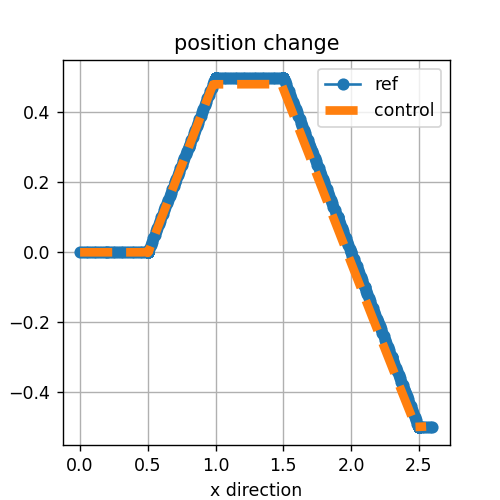

Average time needed per step is 20.023790519877863 ms.
MSE loss: 0.0013013779491471385
Controled path file: Q-[100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.]_R-[0.2 0.1]_rho-0.01_Nc-20
Total time needed is 6951.315900000011 ms.


In [6]:
# get augmented matrices
model_file = 'unmasked_encoder_[3, 32, 64, 8]_decoder_[11, 128, 64, 32, 3]_hyper_[1.0, 3.0, 0.3, 1e-07, 1e-07, 1e-07, 10]_batch_10'
Q = 100*np.diag(np.array([1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.]))
R = 0.1*np.diag(np.array([2.,1.]))
rho = 0.01
# Np = 6
Nc = 20
thre = 0.3
ref = np.load(path+".npy",allow_pickle=True).item()
path_ref = ref['path']
x_init = ref['init state']
u_init = np.array([0.,0.])#1.5*10*np.pi/SimLength,-10*np.pi/SimLength])
t1 = time.perf_counter()
file_name = MPC_control_process(model_file,path_ref,u_init,x_init,Q,R,rho,Nc,thre)
t2 = time.perf_counter()
print("Total time needed is "+str(1000*(t2-t1))+" ms.")

In [ ]:
control_files = [file_name]
ref_file = 'SimLenth_200_Ts_0.1'
MPC_result_plot(ref_file,control_files,Nc)

In [ ]:
from LQR import *
from numpy import pi
import numpy as np
SimLength = 30
init_x = np.array([0.,0.,0.])
path=simulate_path(init_x,SimLength)
model_file = 'unmasked_encoder_[3, 32, 64, 8]_decoder_[11, 128, 64, 32, 3]_hyper_[1.0, 3.0, 0.3, 1e-07, 1e-07, 1e-07, 10]_batch_10'
ref = np.load(path+".npy",allow_pickle=True).item()
path_ref = ref['path']
x_init = ref['init state']
Q = 100*np.diag(np.array([10.,10.,1.,1.,1.,1.,1.,1.,1.,1.,1.]))
R = 1*np.diag(np.array([2.,1.]))
thre = 10
LQR_control_process(model_file,path_ref,x_init,Q,R,thre)

In [ ]:
(np.ones((1,5))-np.tri(1,5,0))[0]

In [ ]:
import numpy as np
from Koopman_numpy import Koopman_numpy
from MPC import *

SimLength = 8
init_x = np.array([0.,0.,0.])
file=simulate_path(init_x,SimLength)
ref = np.load(file+".npy",allow_pickle=True).item()
path_ref = ref['path']
x_init = ref['init state']
diff = path_ref[:,1:]-path_ref[:,:-1]
angle = np.arctan2(diff[1,:],diff[0,:])
path_ref = np.r_[path_ref,np.c_[x_init[2],np.array([angle])]]

In [ ]:
file_name = 'encoder_[3, 32, 64, 6]_decoder_[9, 128, 64, 32, 3]_hyper_[1.0, 3.0, 0.3, 1e-07, 1e-07, 1e-07, 10]_batch_10'
operater = Koopman_numpy(file_name)
lifted_ref = np.zeros((9,path_ref.shape[1]))
for i in range(path_ref.shape[1]):
    lifted_ref[:,i] = operater.encode(path_ref[:,i])
np.save('./matlab/lower_complex/ref_4',lifted_ref)


file_name = 'encoder_[3, 32, 64, 8]_decoder_[11, 128, 64, 32, 3]_hyper_[1.0, 3.0, 0.3, 1e-07, 1e-07, 1e-07, 11]_batch_10'
operater = Koopman_numpy(file_name)
lifted_ref = np.zeros((11,path_ref.shape[1]))
for i in range(path_ref.shape[1]):
    lifted_ref[:,i] = operater.encode(path_ref[:,i])
np.save('./matlab/complex/ref_4',lifted_ref)


file_name = 'unmasked_encoder_[3, 32, 64, 8]_decoder_[11, 128, 64, 32, 3]_hyper_[1.0, 3.0, 0.3, 1e-07, 1e-07, 1e-07, 10]_batch_10'
operater = Koopman_numpy(file_name)
lifted_ref = np.zeros((11,path_ref.shape[1]))
for i in range(path_ref.shape[1]):
    lifted_ref[:,i] = operater.encode(path_ref[:,i])
np.save('./matlab/unmasked/ref_4',lifted_ref)


file_name = 'real_encoder_[3, 32, 64, 8]_decoder_[11, 128, 64, 32, 3]_hyper_[1.0, 3.0, 0.3, 1e-07, 1e-07, 1e-07, 10]_batch_10'
operater = Koopman_numpy(file_name)
lifted_ref = np.zeros((11,path_ref.shape[1]))
for i in range(path_ref.shape[1]):
    lifted_ref[:,i] = operater.encode(path_ref[:,i])
np.save('./matlab/diagonal/ref_4',lifted_ref)

In [ ]:
import numpy as np
ref = np.random.rand(3,2)
print(ref)
temp = np.zeros((3,0))
temp = np.c_[temp,ref[:,0]]
for i in range(1,ref.shape[1]):
    if ref[2,i]!=ref[2,i-1]:
        temp = np.c_[temp,[ref[0,i-1],ref[1,i-1],ref[2,i]]]
    temp = np.c_[temp,ref[:,i]]
ref = temp
print(ref)

In [ ]:
u_max = np.array([1.5,0.5])
u_range = np.eye(2)
for i in range(1,5):
    u_range = np.c_[u_range,np.eye(2)]
print(u_max@u_range)